In [1]:
import numpy as np
import tensorflow as tf
from IPython import display
from scipy.spatial.distance import cosine
import json

In [2]:
endings = ['ություն', 'ության', 'ությամբ', 'ներ', 'ով', 'եր', 'իկ', 'ից', '-', 'ը', 'ի', 'ն']
endings = sorted(endings, key=len)[::-1]

def dissect_word(word):
    ans = []
    repeat_while=True
    flag_one=False
    
    for _ in range(5):
        repeat_loop = False
        
        for e in endings:
            if word[-len(e):] == e:
                repeat_loop=True
                        
                ans.append(e)
                word = word[:-len(e)]
                break
                
        if not repeat_loop:
            break
    
    if word!='':
        if 'չ' == word[0]:
            ans.append(word[1:])
            ans.append('չ')
        elif 'ան' == word[:2]:
            ans.append(word[2:])
            ans.append('ան')
        else:
            ans.append(word)
            
    return  ans[::-1]

In [3]:
# Opening JSON file
f = open('embeddings_e2_w3M.json')
embeddings = json.load(f)
f.close()

In [4]:
def find_emb(word):
    """
    each work can be composed of different suffixes and prefixes
    lets add them up
    """
    word = dissect_word(word)   # to disect the word and combine parts together
    vectr = np.array(embeddings[word[0]])
    for sub_word in word[1:]:
        vectr += np.array(embeddings[sub_word])
    return vectr

def find_related(word, cnt=10):
    """
    prints top 'cnt' similar and opposite vectors
    """
    vectr = find_emb(word)
        
    cos_dist=dict()
    for k, v in embeddings.items():
        cos_dist[k] = 1-cosine(vectr, v) # cosine similarity from cos_distance
        
    cos_dist = sorted(cos_dist.items(), key = lambda x: -x[1]) # sort in discending order
    print('similar vecotrs:')
    for i in cos_dist[:cnt]:
        print(i)
    
    print('opposite vecotrs:')
    for i in cos_dist[-cnt:]:
        print(i)

# here is the testing space

In [5]:
find_related('ություն')

similar vecotrs:
('ություն', 1)
('։', 0.9887239553595865)
('ներ', 0.9877027889349861)
('ե', 0.9876777539593578)
(',', 0.9867991606115166)
('ության', 0.9866464191141544)
('է', 0.9856909686978259)
('ը', 0.9846771675575572)
('»', 0.9842466966380682)
('ով', 0.9836356863525444)
opposite vecotrs:
('պահեստարաններում', -0.4539522462369925)
('գաղտնագր', -0.45488307337596634)
('արտահանվ', -0.4570219592546281)
('ազատվեք', -0.46004928250779153)
('քաղքակա', -0.4624041612533083)
('հրապակում', -0.4696675035779343)
('էվամակ', -0.46998290824627453)
('փրկչակա', -0.49139043283135186)
('թմբլ', -0.49198411773271866)
('թանբայ', -0.5346866803936414)


#### 'ի' ending should be appearing more frequently with similar words and less so with non attachable ones

In [6]:
find_related('այո')

similar vecotrs:
('այո', 1)
('թե', 0.97687244569409)
('բիզնես', 0.9747521116802746)
('մոտ', 0.9742645953599877)
('դրսևորում', 0.9734587219243109)
('դուրս', 0.9731664814416767)
('տեղեկ', 0.9729220071157632)
('արդյունավետ', 0.9727873052963429)
('առաջ', 0.9727090610657327)
('հեռու', 0.9721150616418859)
opposite vecotrs:
('թմբլ', -0.4437553315664069)
('մեկնաբանվելու', -0.4462064423283252)
('age', -0.44746271495323353)
('ծառայությունը', -0.44935973338861235)
('գաղտնագր', -0.46956310422097447)
('թանբայ', -0.5034708760855922)
('կխեղ', -0.5048552562803188)
('քաղքակա', -0.5145286978532959)
('արտահանվ', -0.5186095598683562)
('փրկչակա', -0.519074632927202)


In [7]:
x1 = find_emb('տղամարդ')-find_emb('կին')
x2 = find_emb('տղա')-find_emb('աղջիկ')

1-cosine(x1, x2)

0.883867432832077

## visualize with t-sne

In [20]:
from sklearn.manifold import TSNE

words_to_visualize = ['տղա', 'աղջիկ', 'կին', 'տղամարդ', 'արքա', 'սև', 'սպիտակ', 'հհ', 'հայաստան', 'ռուսաստան', 'թուրքիա',
                      'խաղաղ', 'պատերազմ', 'կռիվ', ',', '։', 'երևան', 'մոսկվա', 'հանցանք', 'փաստաթուղթ', 'տակառ',
                      'new_york_times', 'այո', 'ոչ',
                      '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
words_to_visualize.extend(endings)

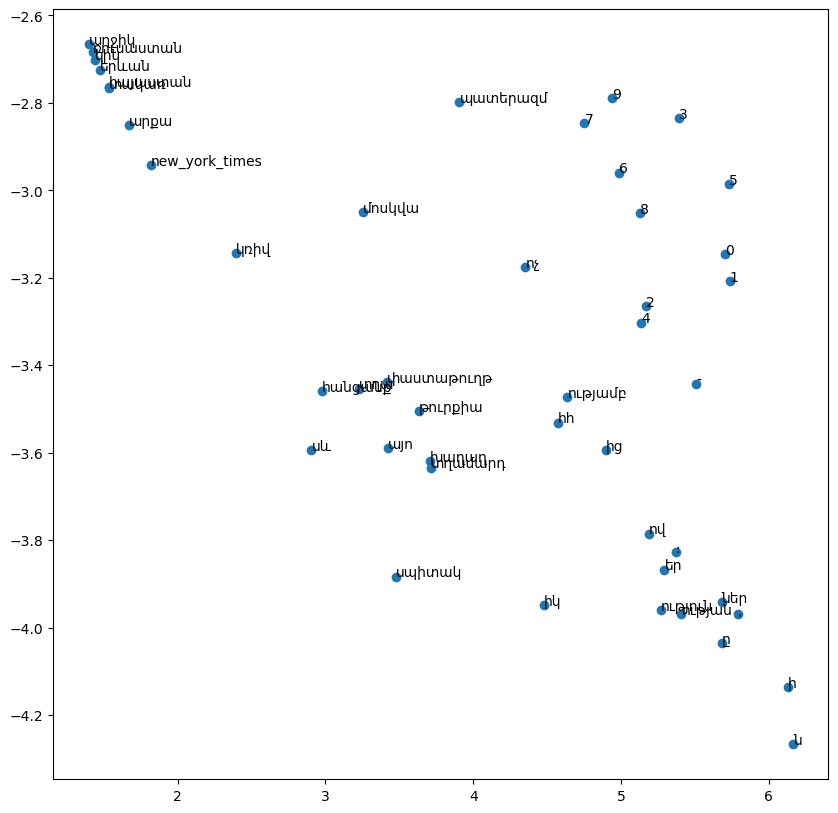

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib tk
plt.figure(figsize=(10,10))

tsne = TSNE()
data_to_emb = [embeddings[i] for i in words_to_visualize]
transformed_cords = tsne.fit_transform(np.array(data_to_emb))

plt.scatter(transformed_cords[:,0], transformed_cords[:,1])
for ind, i in enumerate(words_to_visualize):
    #print(i)
    plt.text(transformed_cords[ind][0], transformed_cords[ind][1], i)
plt.show()

##### As we can see suffixes and numbers are seperated from the rest.

## calculate similarity between two words

In [10]:
def calculate_similarity(word1, word2):
    word1 = dissect_word(word1)
    vectr1 = np.array(embeddings[word1[0]])
    for sub_word in word1[1:]:
        vectr1 += np.array(embeddings[sub_word])

    word2 = dissect_word(word2)
    vectr2 = np.array(embeddings[word2[0]])
    for sub_word in word2[1:]:
        vectr2 += np.array(embeddings[sub_word])

    return 1-cosine(vectr1, vectr2)

In [11]:
calculate_similarity('պատերազմ', 'կռիվ')

0.9099165861830997

In [12]:
calculate_similarity('տղա', 'աղջիկ')

0.9633519542978273

In [13]:
calculate_similarity('կին', 'աղջիկ')

0.9444858732545504

In [14]:
calculate_similarity('ոչ', 'այո')

0.9541996342745418

## numbers should be similar to each other

In [15]:
for i in range(10):
    for j in range(i+1,10):
        print(f'{i} {j} - {calculate_similarity(str(i), str(j))}')

0 1 - 0.9840571863824494
0 2 - 0.9746752752957974
0 3 - 0.9767264254651555
0 4 - 0.9730098007709413
0 5 - 0.9813444673585416
0 6 - 0.9644478220952324
0 7 - 0.9604234162902139
0 8 - 0.9726391690505419
0 9 - 0.9732516648138323
1 2 - 0.978558640043747
1 3 - 0.9799794357464662
1 4 - 0.9791915271310817
1 5 - 0.968065281991147
1 6 - 0.9676671669806909
1 7 - 0.9558660177579769
1 8 - 0.9730014065771166
1 9 - 0.9671732785714576
2 3 - 0.9737422242065698
2 4 - 0.9747075650547165
2 5 - 0.9637313450872049
2 6 - 0.9778656774847461
2 7 - 0.9685229695934775
2 8 - 0.9739324065099118
2 9 - 0.970154910300561
3 4 - 0.9714163037091856
3 5 - 0.9656027960941423
3 6 - 0.9674573862479064
3 7 - 0.96140503527461
3 8 - 0.9736514073321276
3 9 - 0.9724688561966316
4 5 - 0.9648161016987697
4 6 - 0.9705926272257062
4 7 - 0.9712432974157539
4 8 - 0.9791965024461249
4 9 - 0.9653122677059227
5 6 - 0.9651885087135563
5 7 - 0.9553833814054556
5 8 - 0.9620364130543355
5 9 - 0.9599415178571429
6 7 - 0.9713498267999006
6 8 -